<a href="https://colab.research.google.com/github/dmod99/COVID19_Predict/blob/main/data_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imorting all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
import statistics

In [ ]:
#read and shuffle data
df = pd.read_csv("/content/Dataset-2.csv")
df = df.sample(frac = 1,random_state=2)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Patient_ID', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean_platelet_volume_', 'Red_blood_Cells', 'Lymphocytes',
       'Mean_corpuscular_hemoglobin_concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean_corpuscular_hemoglobin_(MCH)', 'Eosinophils',
       'Mean_corpuscular_volume_(MCV)', 'Monocytes',
       'Red_blood_cell_distribution_width_(RDW)', 'Neutrophils',
       'SARS-Cov-2_exam_result'],
      dtype='object')

In [ ]:
df

,Unnamed: 0,Patient_ID,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW),Neutrophils,SARS-Cov-2_exam_result
292,292,1f6aefe93dc5311,0.534067,0.353596,-0.580222,0.459449,0.102004,0.147785,-0.552476,-0.261578,-0.834685,0.387261,-0.414114,0.706990,0.804021,-0.359703,-0.209344,0
141,141,b2366c90eec2924,-0.473031,-0.084996,1.203555,-0.550290,0.507502,1.060392,1.538664,-0.486984,0.692611,-1.076344,1.187183,-1.876823,-0.062665,-0.978899,-1.192725,0
131,131,5c50590b1103c00,-0.129702,-0.147652,0.600588,-1.447836,0.701437,-0.705120,-0.054585,-0.503681,0.387152,-1.494517,0.386534,-1.616438,-1.612194,-0.625073,1.175585,0
453,453,6a8d40ea05031e8,-2.830554,-2.716547,-0.241053,1.244801,-2.948047,-1.865070,-0.353319,2.231804,-1.140144,1.014521,-0.414114,1.307876,-1.270772,4.947686,NaN,0
176,176,8911dde49eac91b,0.694287,0.980156,0.273981,0.683835,0.119635,0.309837,1.239930,-0.837616,1.303529,1.432694,8.350876,0.967375,-0.640455,-0.448160,-1.709001,0
134,134,2da9801abb49678,0.488289,0.228284,0.085554,-0.774677,0.754327,2.024174,-0.851210,-0.692910,0.081693,-0.971801,0.007280,-0.655019,-0.272770,0.347948,-1.782754,0
368,368,f010f8dc5b6cc19,-0.930802,-0.711556,0.537779,-0.550290,-1.237902,-1.182746,0.742040,0.634481,-0.834685,1.171335,-0.835508,0.947345,-1.480878,-0.890442,1.822977,0
152,152,0cd8fd5c5bc3c52,0.419624,0.165628,1.643218,-0.662483,0.754327,1.060392,-0.851210,-0.069565,-0.223767,-1.076344,-0.624811,-0.775198,-0.876824,0.436405,-0.537138,0
123,123,5c30f2f53f06d09,1.586941,1.606716,-0.052626,1.581381,2.023713,-0.150732,0.443306,0.038964,-0.529226,-0.762714,-0.161278,-1.075641,-0.246507,-0.182790,0.347905,0
563,563,9553886457728b3,-0.679027,-0.648900,-0.178244,0.796029,-0.127191,0.113669,-0.054585,-0.528726,-0.529226,-0.971801,-0.751229,-1.075641,-0.088928,-0.182790,0.159424,1


In [ ]:
df['SARS-Cov-2_exam_result'].value_counts()

0    519
1     83
Name: SARS-Cov-2_exam_result, dtype: int64

In [ ]:
df.shape

(602, 18)

In [ ]:
#dropping id column as it is not a valid attribute to train model
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['Patient_ID'], axis = 1)

In [ ]:
df

,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW),Neutrophils,SARS-Cov-2_exam_result
292,0.534067,0.353596,-0.580222,0.459449,0.102004,0.147785,-0.552476,-0.261578,-0.834685,0.387261,-0.414114,0.706990,0.804021,-0.359703,-0.209344,0
141,-0.473031,-0.084996,1.203555,-0.550290,0.507502,1.060392,1.538664,-0.486984,0.692611,-1.076344,1.187183,-1.876823,-0.062665,-0.978899,-1.192725,0
131,-0.129702,-0.147652,0.600588,-1.447836,0.701437,-0.705120,-0.054585,-0.503681,0.387152,-1.494517,0.386534,-1.616438,-1.612194,-0.625073,1.175585,0
453,-2.830554,-2.716547,-0.241053,1.244801,-2.948047,-1.865070,-0.353319,2.231804,-1.140144,1.014521,-0.414114,1.307876,-1.270772,4.947686,NaN,0
176,0.694287,0.980156,0.273981,0.683835,0.119635,0.309837,1.239930,-0.837616,1.303529,1.432694,8.350876,0.967375,-0.640455,-0.448160,-1.709001,0
134,0.488289,0.228284,0.085554,-0.774677,0.754327,2.024174,-0.851210,-0.692910,0.081693,-0.971801,0.007280,-0.655019,-0.272770,0.347948,-1.782754,0
368,-0.930802,-0.711556,0.537779,-0.550290,-1.237902,-1.182746,0.742040,0.634481,-0.834685,1.171335,-0.835508,0.947345,-1.480878,-0.890442,1.822977,0
152,0.419624,0.165628,1.643218,-0.662483,0.754327,1.060392,-0.851210,-0.069565,-0.223767,-1.076344,-0.624811,-0.775198,-0.876824,0.436405,-0.537138,0
123,1.586941,1.606716,-0.052626,1.581381,2.023713,-0.150732,0.443306,0.038964,-0.529226,-0.762714,-0.161278,-1.075641,-0.246507,-0.182790,0.347905,0
563,-0.679027,-0.648900,-0.178244,0.796029,-0.127191,0.113669,-0.054585,-0.528726,-0.529226,-0.971801,-0.751229,-1.075641,-0.088928,-0.182790,0.159424,1


In [ ]:
df.isnull().any()

Hematocrit                                          False
Hemoglobin                                          False
Platelets                                           False
Mean_platelet_volume_                                True
Red_blood_Cells                                     False
Lymphocytes                                         False
Mean_corpuscular_hemoglobin_concentration (MCHC)    False
Leukocytes                                          False
Basophils                                           False
Mean_corpuscular_hemoglobin_(MCH)                   False
Eosinophils                                         False
Mean_corpuscular_volume_(MCV)                       False
Monocytes                                            True
Red_blood_cell_distribution_width_(RDW)             False
Neutrophils                                          True
SARS-Cov-2_exam_result                              False
dtype: bool

In [ ]:
#df = df.fillna(lambda x: x.median())

In [ ]:
data = df.to_numpy()

data.shape

(602, 16)

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(data)
#X_2 = X
SimpleImputer()
data = imp.transform(data)

data

array([[ 0.53406668,  0.35359588, -0.58022207, ..., -0.35970309,
        -0.20934382,  0.        ],
       [-0.47303089, -0.0849959 ,  1.20355487, ..., -0.97889912,
        -1.19272518,  0.        ],
       [-0.12970226, -0.14765212,  0.60058802, ..., -0.62507266,
         1.17558503,  0.        ],
       ...,
       [-3.26543665, -3.5937314 , -0.15312053, ...,  3.09009933,
         0.43804905,  0.        ],
       [-1.09102166, -0.774212  , -0.64303112, ..., -0.97889912,
        -0.1355904 ,  0.        ],
       [-0.51880735, -0.27296397, -0.21592958, ..., -0.80198544,
        -0.12739536,  1.        ]])

In [ ]:
#splitting into 7 folds
data_g = np.array_split(data, 7)

## **LOGISTIC REGRESSION**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8209459459459459
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.91      0.95      0.93        74
Covid Positive       0.56      0.42      0.48        12

      accuracy                           0.87        86
     macro avg       0.73      0.68      0.70        86
  weighted avg       0.86      0.87      0.86        86

------------------TRAINING-----------------
                precision    recall  f1-score   support

Covid Negative       0.90      0.97      0.93       445
Covid Positive       0.62      0.30      0.40        71

      accuracy                           0.88       516
     macro avg       0.76      0.63      0.67       516
  weighted avg       0.86      0.88      0.86       516



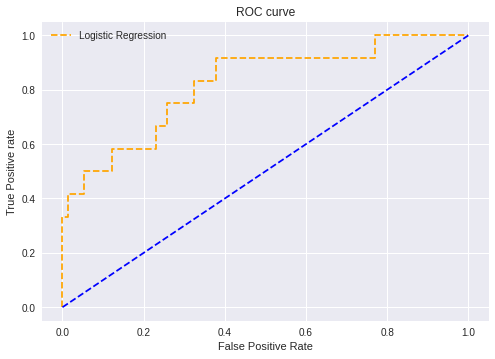

In [ ]:
accuracy_log_test = []
accuracy_log_train = []
classif_log_test=[]
classif_log_train=[]

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:15])
                train_data_y.append(data_g[j][w][15])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:15])
                test_data_y.append(data_g[j][w][15])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)
    arr_2d = np.reshape(test_data_yn, (86, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset2-logistic-regression-test-results.csv")
    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    #calculating and appending accuracies
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))
    print("------------------TRAINING-----------------")
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(train_data_yn, train_pred_y_log, target_names=target_names))


In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(test_data_yn, test_pred_y_log)
cm

array([[70,  4],
       [ 7,  5]])

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))


Mean accuracy for test set =  0.872093023255814
Mean accuracy for train set =  0.877906976744186


# **NAIVE BAYES**

0.759009009009009
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.92      0.81      0.86        74
Covid Positive       0.33      0.58      0.42        12

      accuracy                           0.78        86
     macro avg       0.63      0.70      0.64        86
  weighted avg       0.84      0.78      0.80        86



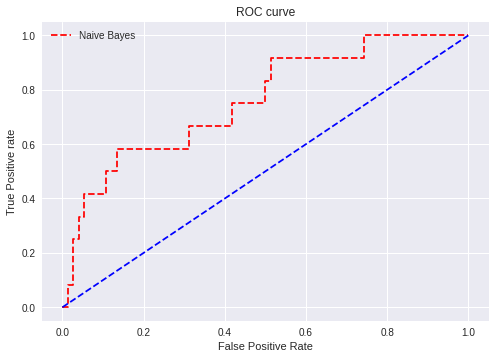

In [ ]:
accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:15])
                train_data_y.append(data_g[j][w][15])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:15])
                test_data_y.append(data_g[j][w][15])
       
    #convert into array         
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)

    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    
    pred_prob1 = clf.predict_proba(test_data_xn)
    arr_2d = np.reshape(test_data_yn, (86, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset2-Naive-Bayes-test-results.csv")
    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr2, tpr2, thresh2 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

Mean accuracy for test set =  0.7790697674418605
Mean accuracy for train set =  0.8158914728682171


# ***Fisher Linear Discriminant***

0.8322072072072072
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.89      0.96      0.92        74
Covid Positive       0.50      0.25      0.33        12

      accuracy                           0.86        86
     macro avg       0.69      0.60      0.63        86
  weighted avg       0.83      0.86      0.84        86



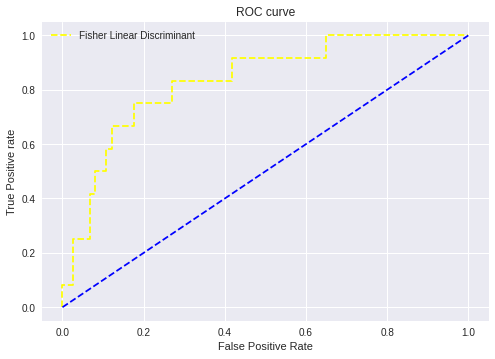

In [ ]:
accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:15])
                train_data_y.append(data_g[j][w][15])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:15])
                test_data_y.append(data_g[j][w][15])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)
    pred_prob1 = clf.predict_proba(test_data_xn)
    arr_2d = np.reshape(test_data_yn, (86, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset2-Fischer's-linear-discriminant-test-results.csv")
    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr3, tpr3, thresh3 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

Mean accuracy for test set =  0.8604651162790697
Mean accuracy for train set =  0.872093023255814


# **KNN**

In [ ]:
df

,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW),Neutrophils,SARS-Cov-2_exam_result
292,0.534067,0.353596,-0.580222,0.459449,0.102004,0.147785,-0.552476,-0.261578,-0.834685,0.387261,-0.414114,0.706990,0.804021,-0.359703,-0.209344,0
141,-0.473031,-0.084996,1.203555,-0.550290,0.507502,1.060392,1.538664,-0.486984,0.692611,-1.076344,1.187183,-1.876823,-0.062665,-0.978899,-1.192725,0
131,-0.129702,-0.147652,0.600588,-1.447836,0.701437,-0.705120,-0.054585,-0.503681,0.387152,-1.494517,0.386534,-1.616438,-1.612194,-0.625073,1.175585,0
453,-2.830554,-2.716547,-0.241053,1.244801,-2.948047,-1.865070,-0.353319,2.231804,-1.140144,1.014521,-0.414114,1.307876,-1.270772,4.947686,NaN,0
176,0.694287,0.980156,0.273981,0.683835,0.119635,0.309837,1.239930,-0.837616,1.303529,1.432694,8.350876,0.967375,-0.640455,-0.448160,-1.709001,0
134,0.488289,0.228284,0.085554,-0.774677,0.754327,2.024174,-0.851210,-0.692910,0.081693,-0.971801,0.007280,-0.655019,-0.272770,0.347948,-1.782754,0
368,-0.930802,-0.711556,0.537779,-0.550290,-1.237902,-1.182746,0.742040,0.634481,-0.834685,1.171335,-0.835508,0.947345,-1.480878,-0.890442,1.822977,0
152,0.419624,0.165628,1.643218,-0.662483,0.754327,1.060392,-0.851210,-0.069565,-0.223767,-1.076344,-0.624811,-0.775198,-0.876824,0.436405,-0.537138,0
123,1.586941,1.606716,-0.052626,1.581381,2.023713,-0.150732,0.443306,0.038964,-0.529226,-0.762714,-0.161278,-1.075641,-0.246507,-0.182790,0.347905,0
563,-0.679027,-0.648900,-0.178244,0.796029,-0.127191,0.113669,-0.054585,-0.528726,-0.529226,-0.971801,-0.751229,-1.075641,-0.088928,-0.182790,0.159424,1


In [ ]:
y=df[['SARS-Cov-2_exam_result']] 
y

,SARS-Cov-2_exam_result
292,0
141,0
131,0
453,0
176,0
134,0
368,0
152,0
123,0
563,1


In [ ]:
x=df.drop(['SARS-Cov-2_exam_result'], axis = 1)
x

,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW),Neutrophils
292,0.534067,0.353596,-0.580222,0.459449,0.102004,0.147785,-0.552476,-0.261578,-0.834685,0.387261,-0.414114,0.706990,0.804021,-0.359703,-0.209344
141,-0.473031,-0.084996,1.203555,-0.550290,0.507502,1.060392,1.538664,-0.486984,0.692611,-1.076344,1.187183,-1.876823,-0.062665,-0.978899,-1.192725
131,-0.129702,-0.147652,0.600588,-1.447836,0.701437,-0.705120,-0.054585,-0.503681,0.387152,-1.494517,0.386534,-1.616438,-1.612194,-0.625073,1.175585
453,-2.830554,-2.716547,-0.241053,1.244801,-2.948047,-1.865070,-0.353319,2.231804,-1.140144,1.014521,-0.414114,1.307876,-1.270772,4.947686,NaN
176,0.694287,0.980156,0.273981,0.683835,0.119635,0.309837,1.239930,-0.837616,1.303529,1.432694,8.350876,0.967375,-0.640455,-0.448160,-1.709001
134,0.488289,0.228284,0.085554,-0.774677,0.754327,2.024174,-0.851210,-0.692910,0.081693,-0.971801,0.007280,-0.655019,-0.272770,0.347948,-1.782754
368,-0.930802,-0.711556,0.537779,-0.550290,-1.237902,-1.182746,0.742040,0.634481,-0.834685,1.171335,-0.835508,0.947345,-1.480878,-0.890442,1.822977
152,0.419624,0.165628,1.643218,-0.662483,0.754327,1.060392,-0.851210,-0.069565,-0.223767,-1.076344,-0.624811,-0.775198,-0.876824,0.436405,-0.537138
123,1.586941,1.606716,-0.052626,1.581381,2.023713,-0.150732,0.443306,0.038964,-0.529226,-0.762714,-0.161278,-1.075641,-0.246507,-0.182790,0.347905
563,-0.679027,-0.648900,-0.178244,0.796029,-0.127191,0.113669,-0.054585,-0.528726,-0.529226,-0.971801,-0.751229,-1.075641,-0.088928,-0.182790,0.159424


In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(x)
#X_2 = X
SimpleImputer()
X = imp.transform(x)
X

array([[ 0.53406668,  0.35359588, -0.58022207, ...,  0.80402118,
        -0.35970309, -0.20934382],
       [-0.47303089, -0.0849959 ,  1.20355487, ..., -0.06266452,
        -0.97889912, -1.19272518],
       [-0.12970226, -0.14765212,  0.60058802, ..., -1.61219394,
        -0.62507266,  1.17558503],
       ...,
       [-3.26543665, -3.5937314 , -0.15312053, ..., -0.48287594,
         3.09009933,  0.43804905],
       [-1.09102166, -0.774212  , -0.64303112, ...,  0.54138905,
        -0.97889912, -0.1355904 ],
       [-0.51880735, -0.27296397, -0.21592958, ...,  2.53739309,
        -0.80198544, -0.12739536]])

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.83994708994709


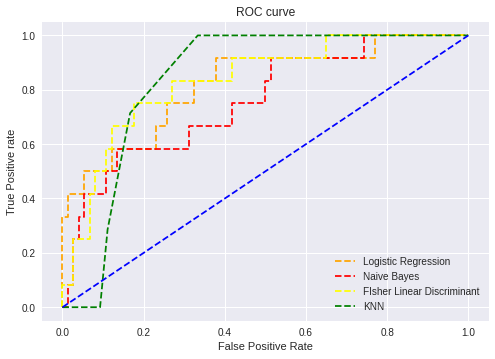

In [ ]:
#Fitting K-NN classifier to the training set
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#importing model from sklearn 
    
    #predict class
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve
arr_2d = np.reshape(y_test, (61, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset2-KNN-test-results.csv")
    # roc curve for models
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

    # matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)

In [ ]:
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 81.97%
The Confusion Matrix is:
  [[48  6]
 [ 5  2]]
                precision    recall  f1-score   support

Covid Negative       0.91      0.89      0.90        54
Covid Positive       0.25      0.29      0.27         7

      accuracy                           0.82        61
     macro avg       0.58      0.59      0.58        61
  weighted avg       0.83      0.82      0.82        61



**XGBOOST**

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(scale_pos_weight = 0.9)
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.9, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 91.80%
The Confusion Matrix is:
  [[51  3]
 [ 2  5]]
                precision    recall  f1-score   support

Covid Negative       0.96      0.94      0.95        54
Covid Positive       0.62      0.71      0.67         7

      accuracy                           0.92        61
     macro avg       0.79      0.83      0.81        61
  weighted avg       0.92      0.92      0.92        61



In [ ]:
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve

    # roc curve for models
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')


0.9417989417989417



# New Section

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)



Accuracy: 95.08%
The Confusion Matrix is:
  [[53  1]
 [ 2  5]]
                precision    recall  f1-score   support

Covid Negative       0.96      0.98      0.97        54
Covid Positive       0.83      0.71      0.77         7

      accuracy                           0.95        61
     macro avg       0.90      0.85      0.87        61
  weighted avg       0.95      0.95      0.95        61

0.9351851851851852


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


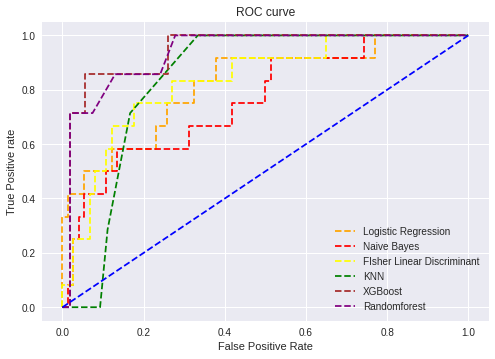

In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

arr_2d = np.reshape(y_test, (61, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset2-RandomForest-test-results.csv")

from sklearn.metrics import roc_curve

    # roc curve for models
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')



plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 88.52%
The Confusion Matrix is:
  [[54  0]
 [ 7  0]]
                precision    recall  f1-score   support

Covid Negative       0.89      1.00      0.94        54
Covid Positive       0.00      0.00      0.00         7

      accuracy                           0.89        61
     macro avg       0.44      0.50      0.47        61
  weighted avg       0.78      0.89      0.83        61

0.7724867724867724


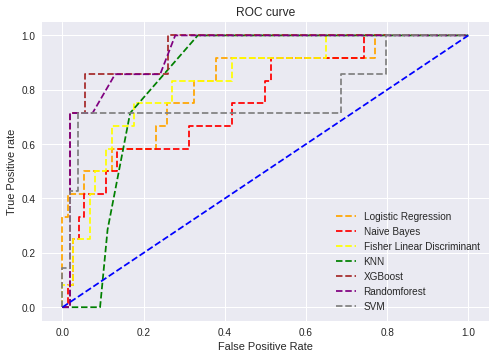

In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)
arr_2d = np.reshape(y_test, (61, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset2-SVM-test-results.csv")
from sklearn.metrics import roc_curve

    # roc curve for models
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')
plt.plot(fpr7, tpr7, linestyle='--',color='grey', label='SVM')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
!pip3 install pandas_ml
!pip3 install scikit-learn==0.21
!pip3 install pandas==0.24.2

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(602, 18)


No handles with labels found to put in legend.


AUC Score is  0.8495475113122172 

CONFUSION MATRIX -
 Predicted  False  True  __all__
Actual                         
False         97     7      104
True           5    12       17
__all__      102    19      121 

population: 121
P: 17
N: 104
PositiveTest: 19
NegativeTest: 102
TP: 12
TN: 97
FP: 7
FN: 5
TPR: 0.7058823529411765
TNR: 0.9326923076923077
PPV: 0.631578947368421
NPV: 0.9509803921568627
FPR: 0.0673076923076923
FDR: 0.3684210526315789
FNR: 0.29411764705882354
ACC: 0.9008264462809917
F1_score: 0.6666666666666666
MCC: 0.6099242842650429
informedness: 0.6385746606334841
markedness: 0.5825593395252837
prevalence: 0.14049586776859505
LRP: 10.487394957983195
LRN: 0.31534263189812006
DOR: 33.25714285714287
FOR: 0.049019607843137254


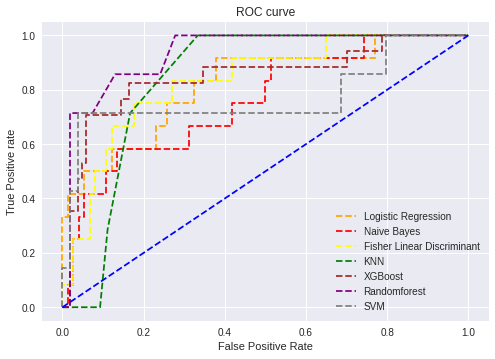

In [ ]:
from pandas_ml import ConfusionMatrix
dataset = pd.read_csv('/content/Dataset-2.csv')
print(dataset.shape)
total_neg_samples=sum(dataset['SARS-Cov-2_exam_result']==0)
total_pos_samples=sum(dataset['SARS-Cov-2_exam_result']==1)
scale_pos_weight = total_neg_samples / total_pos_samples

dataset.reset_index(inplace = True)

y = dataset[['SARS-Cov-2_exam_result']]

X = dataset
X.drop(labels=None, axis=1, columns=['SARS-Cov-2_exam_result','index','Patient_ID','Unnamed: 0'], level=None, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, scale_pos_weight = scale_pos_weight)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

y_pred = model.predict(X_test)
test_probs = model.predict_proba(X_test)
test_probs = test_probs[:, 1]
auc = roc_auc_score(y_test, test_probs)
print('AUC Score is ', (auc), '\n')
from sklearn.metrics import roc_curve
arr_2d = np.reshape(y_test, (121, 1))
new_np = np.hstack((X_test,arr_2d))
test_probs = np.reshape(test_probs,(121,1))
finaltocsv= np.hstack((new_np,test_probs))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset2-XGBoost(Improved)-test-results.csv")
    # roc curve for models
fpr8, tpr8, thresh8 = roc_curve(y_test, test_probs, pos_label=1)
pred = pd.DataFrame(y_pred, columns=['SARS-Cov-2_exam_result'])
test = pd.DataFrame(y_test, columns=['SARS-Cov-2_exam_result'])
test.reset_index(inplace = True)
test.drop(labels=None, axis=1, columns=['index'], level=None, inplace=True)

CM = ConfusionMatrix(test['SARS-Cov-2_exam_result'], pred['SARS-Cov-2_exam_result'])

print('CONFUSION MATRIX -\n',(CM), '\n')
CM.print_stats()
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr8, tpr8, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')
plt.plot(fpr7, tpr7, linestyle='--',color='grey', label='SVM')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();